<a href="https://colab.research.google.com/github/Voyageran/AMA620assign2/blob/main/Assign2JIANGRan23036623R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMA620 Assignment 2: JIANG Ran & 23036623R

In [ ]:
# !pip install matplotlib-venn
# !apt-get -qq install -y libfluidsynth1

# # https://pypi.python.org/pypi/libarchive
# !apt-get -qq install -y libarchive-dev && pip install -U libarchive
# import libarchive

# # https://pypi.python.org/pypi/pydot
# !apt-get -qq install -y graphviz && pip install pydot
# import pydot

# !pip install cartopy
# import cartopy

In [4]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')

nb_path = '/content/gdrive/MyDrive/assign2'
# os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)
# !cp -av '/content/gdrive/MyDrive/Colab Notebooks/d2l' '/content/'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# !pip install --target=$nb_path albumentations==0.5.2
%cd '/content/gdrive/MyDrive/assign2'
!pwd

/content/gdrive/MyDrive/assign2
/content/gdrive/MyDrive/assign2


## Dataset: LSUN

In [ ]:
# LSUN bedroom
%cd "/content/gdrive/MyDrive/assign2/lsun"
# !python download.py

/content/gdrive/MyDrive/assign2/lsun
** Resuming transfer from byte position 442368
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 42.7G  100 42.7G    0     0  1948k      0  6:23:29  6:23:29 --:--:-- 1820k
** Resuming transfer from byte position 4670661
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   206  100   206    0     0    637      0 --:--:-- --:--:-- --:--:--   637
** Resuming transfer from byte position 4217364480
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.4G  100 11.4G    0     0  2771k      0  1:12:00  1:12:00 --:--:-- 2130k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                          

In [ ]:
!unzip bedroom_val_lmdb.zip

In [ ]:
%cd "/content/gdrive/MyDrive/assign2/lsun"
!unzip bedroom_train_lmdb

/content/gdrive/MyDrive/assign2/lsun
Archive:  bedroom_train_lmdb.zip
   creating: bedroom_train_lmdb/
  inflating: bedroom_train_lmdb/lock.mdb  
  inflating: bedroom_train_lmdb/data.mdb  

In [ ]:
!pip install lmdb
# %cd "/content/gdrive/MyDrive/assign2/lsun"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 7.8 MB/s eta 0:00:00


In [ ]:
# !pip install lmdb
%cd "/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets"
!python lsun_bedroom.py "/content/gdrive/MyDrive/assign2/lsun/bedroom_val_lmdb" lsun_evl_output_dir

/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets


In [ ]:
# !pip install lmdb
%cd "/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets"
!python lsun_bedroom.py "/content/gdrive/MyDrive/assign2/lsun/bedroom_val_lmdb" lsun_evl_output_dir


In [ ]:
# !pip install wand
from PIL import Image

# get images
img1 = Image.open('bedroom_0000000.png')
img2 = Image.open('bedroom_0000001.png')
img3 = Image.open('bedroom_0000002.png')
img4 = Image.open('bedroom_0000003.png')

# get width and height
w1, h1 = img1.size
w2, h2 = img2.size
w3, h3 = img3.size
w4, h4 = img4.size

# to calculate size of new image
w = max(w1, w2, w3, w4)
h = max(h1, h2, h3, h4)

# create big empty image with place for images
new_image = Image.new('RGB', (w*2, h*2))

# put images on new_image
new_image.paste(img1, (0, 0))
new_image.paste(img2, (w, 0))
new_image.paste(img3, (0, h))
new_image.paste(img4, (w, h))

# save it
new_image.save('/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets/bedroom1234.png')

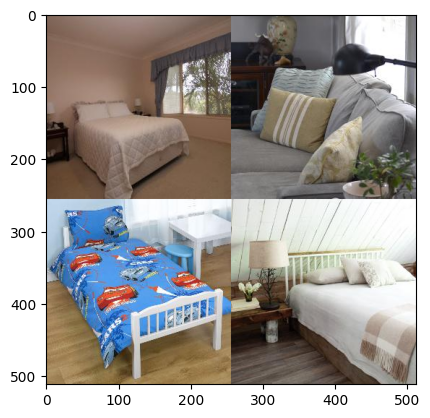

In [ ]:
# %cd "/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets/lsun_evl_output_dir"
# Check data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets/bedroom1234.png')
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
# !ls
# %cd ../
# !pwd
# %cd '/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets'
# !python lsun_bedroom.py bedroom_train_lmdb lsun_train_output_dir
# !python lsun_bedroom.py bedroom_train_lmdb /content/gdrive/MyDrive/assign2/lsun
%cd "/content/gdrive/MyDrive/assign2/lsun"
!unzip church_outdoor_train_lmdb.zip

/content/gdrive/MyDrive/assign2/lsun
Archive:  church_outdoor_train_lmdb.zip
   creating: church_outdoor_train_lmdb/
  inflating: church_outdoor_train_lmdb/lock.mdb  
  inflating: church_outdoor_train_lmdb/data.mdb  


## Manual version of  UNet DDPM & style GAN

### UNet DDPM

In [ ]:
!pip install labml_helpers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import math
from typing import Optional, Tuple, Union, List
import torch
from torch import nn
from labml_helpers.module import Module

In [ ]:
class Swish(Module): #add an activate function
  def forward(self, x):
    return x * torch.sigmoid(x)

In [ ]:
class TimeEmbedding(nn.Module):
  def __init__(self, n_channels: int):
    super().__init__()
    self.n_channels = n_channels
    self.lin1 = nn.Linear(self.n_channels // 4, self.n_channels) #layer 1
    self.act = Swish()
    self.lin2 = nn.Linear(self.n_channels, self.n_channels)

# transformer block
  def forward(self, t: torch.Tensor):
    half_dim = self.n_channels // 8
    emb = math.log(10_000) / (half_dim - 1)
    emb = torch.exp(torch.arange(half_dim, device=t.device) * -emb)
    emb = t[:, None] * emb[None, :]
    emb = torch.cat((emb.sin(), emb.cos()), dim=1)
    emb = self.act(self.lin1(emb))
    emb = self.lin2(emb) #Transform with the MLP
    return emb

In [ ]:
class ResidualBlock(Module):
  '''Residual block'''
  def __init__(self, in_channels: int, out_channels: int, time_channels: int,
                n_groups: int = 32, dropout: float = 0.1):
    super().__init__()
    self.norm1 = nn.GroupNorm(n_groups, in_channels)
    self.act1 = Swish()
    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=(3, 3), padding=(1, 1))
    self.norm2 = nn.GroupNorm(n_groups, out_channels)
    self.act2 = Swish()
    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=(3, 3), padding=(1, 1))

    if in_channels != out_channels:
      self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=(1, 1))
    else:
      self.shortcut = nn.Identity()

    self.time_emb = nn.Linear(time_channels, out_channels)
    self.time_act = Swish()

    self.dropout = nn.Dropout(dropout)

  def forward(self, x: torch.Tensor, t: torch.Tensor):
    h = self.conv1(self.act1(self.norm1(x)))
    h += self.time_emb(self.time_act(t))[:, :, None, None]
    h = self.conv2(self.dropout(self.act2(self.norm2(h))))
    return h + self.shortcut(x)


In [ ]:
#Attention block
class AttentionBlock(Module):
  def __init__(self, n_channels: int, n_heads: int = 1, d_k: int = None, n_groups: int = 32):
    super().__init__()

    if d_k is None:
      d_k = n_channels

    self.norm = nn.GroupNorm(n_groups, n_channels)
    self.projection = nn.Linear(n_channels, n_heads * d_k * 3)
    self.output = nn.Linear(n_heads * d_k, n_channels)
    self.scale = d_k ** -0.5
    self.n_heads = n_heads
    self.d_k = d_k

  def forward(self, x: torch.Tensor, t: Optional[torch.Tensor] = None):
    _ = t
    batch_size, n_channels, height, width = x.shape
    x = x.view(batch_size, n_channels, -1).permute(0, 2, 1)
    qkv = self.projection(x).view(batch_size, -1, self.n_heads, 3 * self.d_k)
    q, k, v = torch.chunk(qkv, 3, dim=-1)
    attn = torch.einsum('bihd,bjhd->bijh', q, k) * self.scale
    attn = attn.softmax(dim=2)
    res = torch.einsum('bijh,bjhd->bihd', attn, v)
    res = res.view(batch_size, -1, self.n_heads * self.d_k)
    res = self.output(res)
    res += x
    res = res.permute(0, 2, 1).view(batch_size, n_channels, height, width)
    return res

In [ ]:
#Down block
class DownBlock(Module):
  '''combines ResidualBlock and AttentionBlock, used in the first half of U-Net at each resolution.'''
  def __init__(self, in_channels: int, out_channels: int, time_channels: int, has_attn: bool):
    super().__init__()
    self.res = ResidualBlock(in_channels, out_channels, time_channels)

    if has_attn:
      self.attn = AttentionBlock(out_channels)
    else:
      self.attn = nn.Identity()

  def forward(self, x: torch.Tensor, t: torch.Tensor):
    x = self.res(x, t)
    x = self.attn(x)
    return x


In [ ]:
#Up block
class UpBlock(Module):
  '''combines ResidualBlock and AttentionBlock'''
  def __init__(self, in_channels: int, out_channels: int, time_channels: int, has_attn: bool):
    super().__init__()
    self.res = ResidualBlock(in_channels + out_channels, out_channels, time_channels)

    if has_attn:
      self.attn = AttentionBlock(out_channels)
    else:
      self.attn = nn.Identity()
def forward(self, x: torch.Tensor, t: torch.Tensor):
  x = self.res(x, t)
  x = self.attn(x)
  return x


In [ ]:
class MiddleBlock(Module):
  """combines a ResidualBlock , AttentionBlock , followed by another ResidualBlock
  applied at the lowest resolution of the U-Net"""
  def __init__(self, n_channels: int, time_channels: int):
    super().__init__()
    self.res1 = ResidualBlock(n_channels, n_channels, time_channels)
    self.attn = AttentionBlock(n_channels)
    self.res2 = ResidualBlock(n_channels, n_channels, time_channels)

    def forward(self, x: torch.Tensor, t: torch.Tensor):
      x = self.res1(x, t)
      x = self.attn(x)
      x = self.res2(x, t)
      return x

In [ ]:
#Scale up the feature map by 2
class Upsample(nn.Module):
  """Scale up the feature map by 2"""
  def __init__(self, n_channels):
    super().__init__()
    self.conv = nn.ConvTranspose2d(n_channels, n_channels, (4, 4), (2, 2), (1, 1))

  def forward(self, x: torch.Tensor, t: torch.Tensor):
    _ = t
    return self.conv(x)

In [ ]:
#Scale down the feature map by 1/2
class Downsample(nn.Module):
  """Scale up the feature map by 1/2"""
  def __init__(self, n_channels):
    super().__init__()
    self.conv = nn.Conv2d(n_channels, n_channels, (3, 3), (2, 2), (1, 1))

  def forward(self, x: torch.Tensor, t: torch.Tensor):
    _ = t
    return self.conv(x)

In [ ]:
class UNet(Module):
  """UNet
  image_channels is the number of channels in the image.
  n_channels is number of channels in the initial feature map that we transform the image into
  ch_mults is the list of channel numbers at each resolution. The number of channels is ch_mults[i] * n_channels
  is_attn is a list of booleans that indicate whether to use attention at each resolution
  n_blocks is the number of UpDownBlocks at each resolution"""
  def __init__(self, image_channels: int = 3, n_channels: int = 64,
               ch_mults: Union[Tuple[int, ...], List[int]] = (1, 2, 2, 4),
               is_attn: Union[Tuple[bool, ...], List[bool]] = (False, False, True, True),
               n_blocks: int = 2):
    super().__init__()
    n_resolutions = len(ch_mults) #Number of resolutions
    # Project image into feature map
    self.image_proj = nn.Conv2d(image_channels, n_channels, kernel_size=(3, 3), padding=(1, 1))
    #Time embedding layer. Time embedding has n_channels * 4 channels
    self.time_emb = TimeEmbedding(n_channels * 4)

    # First half of U-Net: decreasing resolution
    down = []
    out_channels = in_channels = n_channels

    for i in range(n_resolutions):
      out_channels = in_channels * ch_mults[i]
      for _ in range(n_blocks):
        down.append(DownBlock(in_channels, out_channels, n_channels * 4, is_attn[i]))
        in_channels = out_channels
      #Down sample at all resolutions except the last
      if i < n_resolutions - 1:
        down.append(Downsample(in_channels))

    # Combine the set of modules
    self.down = nn.ModuleList(down)
    # Middle block
    self.middle = MiddleBlock(out_channels, n_channels * 4, )

    # Second half of U-Net: increasing resolution
    up = []
    in_channels = out_channels
    for i in reversed(range(n_resolutions)):
      out_channels = in_channels
      for _ in range(n_blocks):
        up.append(UpBlock(in_channels, out_channels, n_channels * 4, is_attn[i]))

      out_channels = in_channels // ch_mults[i]
      up.append(UpBlock(in_channels, out_channels, n_channels * 4, is_attn[i]))
      in_channels = out_channels
      # Up sample at all resolutions except last
      if i > 0:
        up.append(Upsample(in_channels))
    self.up = nn.ModuleList(up)
    # normalization and convolution layer
    self.norm = nn.GroupNorm(8, n_channels)
    self.act = Swish()
    self.final = nn.Conv2d(in_channels, image_channels, kernel_size=(3, 3), padding=(1, 1))


  def forward(self, x: torch.Tensor, t: torch.Tensor):
    t = self.time_emb(t) # Get time-step embeddings
    x = self.image_proj(x) # Get image projection
    # h will store outputs at each resolution for skip connection
    h = [x]
    # First half of U-Net
    for m in self.down:
      x = m(x, t)
      h.append(x)
    # Middle (bottom)
    x = self.middle(x, t)
    # Second half of U-Net
    for m in self.up:
      if isinstance(m, Upsample):
        x = m(x, t)
      else:
        # Get the skip connection from first half of U-Net and concatenate
        s = h.pop()
        x = torch.cat((x, s), dim=1)
        x = m(x, t)
    return self.final(self.act(self.norm(x))) # Final normalization and convolution

In [ ]:
%cd '/content/gdrive/MyDrive/assign2/DDPM'

/content/gdrive/MyDrive/assign2/DDPM


In [ ]:
!pwd

/content/gdrive/MyDrive/assign2/DDPM


install_requires:

[
    'accelerate',
    'einops',
    'ema-pytorch>=0.4.2',
    'numpy',
    'pillow',
    'pytorch-fid',
    'torch',
    'torchvision',
    'tqdm'
  ]

In [ ]:
# !pip install einops
# !pip install ema_pytorch
# !pip install accelerate
# !pip install pytorch-fid # FID score

In [ ]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion

In [ ]:
# Example
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = True
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000    # number of steps
)

training_images = torch.rand(8, 3, 128, 128) # images are normalized from 0 to 1
loss = diffusion(training_images)
loss.backward()

# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([4, 3, 128, 128])

In [ ]:
# sampled_images

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sampled_images[0][-1]

tensor([[0.0077, 0.0124, 0.1976,  ..., 1.0000, 0.5071, 0.2072],
        [0.0000, 0.3213, 0.0000,  ..., 0.5944, 0.5369, 0.1866],
        [0.0019, 0.3530, 0.4448,  ..., 1.0000, 0.2576, 1.0000],
        ...,
        [0.0974, 1.0000, 0.0000,  ..., 0.1316, 0.5573, 0.0252],
        [0.4946, 0.4566, 0.0907,  ..., 0.0094, 0.8517, 0.7232],
        [0.0313, 0.7005, 0.6762,  ..., 0.0000, 0.8461, 0.3318]])

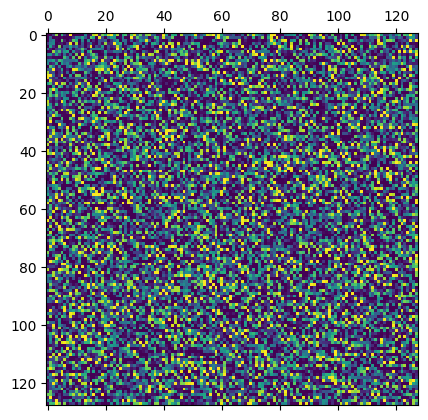

In [ ]:
plt.matshow(sampled_images[0][-1])

plt.show()

In [ ]:
# PATH = "DDPMsample.pt"

# torch.save({
#             'epoch': EPOCH,
#             'model_state_dict': net.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': LOSS,
#             }, PATH)

In [ ]:
# model = Net()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# epoch =
# loss =

# checkpoint = torch.load(PATH)
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

# model.eval()
# - or -
model.train()


### Style GAN

In [ ]:
!pip install labml_nn

  Using cached labml_nn-0.4.136-py3-none-any.whl (434 kB)
  Using cached labml-0.4.168-py3-none-any.whl (130 kB)
  Using cached labml_helpers-0.4.89-py3-none-any.whl (24 kB)
  Using cached einops-0.7.0-py3-none-any.whl (44 kB)
  Using cached fairscale-0.4.13.tar.gz (266 kB)
  Installing build dependencies ... canceledERROR: Operation cancelled by user


In [ ]:
import math
from pathlib import Path
from typing import Iterator, Tuple

import torch
import torch.utils.data
import torchvision
from PIL import Image

from labml import tracker, lab, monit, experiment
from labml.configs import BaseConfigs
from labml_helpers.device import DeviceConfigs
from labml_helpers.train_valid import ModeState, hook_model_outputs
from labml_nn.gan.stylegan import Discriminator, Generator, MappingNetwork, GradientPenalty, PathLengthPenalty
from labml_nn.gan.wasserstein import DiscriminatorLoss, GeneratorLoss
from labml_nn.utils import cycle_dataloader

ModuleNotFoundError: No module named 'labml'

In [ ]:
class Dataset(torch.utils.data.Dataset):
    """
    Loads the training dataset and resize it to the give image size.
    """

    def __init__(self, path: str, image_size: int):
        """
        * `path` path to the folder containing the images
        * `image_size` size of the image
        """
        super().__init__()

        # Get the paths of all `jpg` files
        self.paths = [p for p in Path(path).glob(f'**/*.jpg')]

        # Transformation
        self.transform = torchvision.transforms.Compose([
            # Resize the image
            torchvision.transforms.Resize(image_size),
            # Convert to PyTorch tensor
            torchvision.transforms.ToTensor(),
        ])
    def __len__(self):
        """Number of images"""
        return len(self.paths)

    def __getitem__(self, index):
        """Get the the `index`-th image"""
        path = self.paths[index]
        img = Image.open(path)
        return self.transform(img)

In [ ]:
class Configs(BaseConfigs):
    """
    ## Configurations
    """
    #  picks up an available CUDA device or defaults to CPU.
    device: torch.device = DeviceConfigs()

    discriminator: Discriminator
    generator: Generator
    mapping_network: MappingNetwork

    # Discriminator and generator loss functions.
    discriminator_loss: DiscriminatorLoss
    generator_loss: GeneratorLoss

    # Optimizers
    generator_optimizer: torch.optim.Adam
    discriminator_optimizer: torch.optim.Adam
    mapping_network_optimizer: torch.optim.Adam

    # [Gradient Penalty Regularization Loss](index.html#gradient_penalty)
    gradient_penalty = GradientPenalty()
    # Gradient penalty coefficient $\gamma$
    gradient_penalty_coefficient: float = 10.

    # [Path length penalty](index.html#path_length_penalty)
    path_length_penalty: PathLengthPenalty

    # Data loader
    loader: Iterator

    # Batch size
    batch_size: int = 32
    # Dimensionality of $z$ and $w$
    d_latent: int = 512
    # Height/width of the image
    image_size: int = 32
    # Number of layers in the mapping network
    mapping_network_layers: int = 8
    # Generator & Discriminator learning rate
    learning_rate: float = 1e-3
    # Mapping network learning rate ($100 \times$ lower than the others)
    mapping_network_learning_rate: float = 1e-5
    # Number of steps to accumulate gradients on. Use this to increase the effective batch size.
    gradient_accumulate_steps: int = 1
    # $\beta_1$ and $\beta_2$ for Adam optimizer
    adam_betas: Tuple[float, float] = (0.0, 0.99)
    # Probability of mixing styles
    style_mixing_prob: float = 0.9

    # Total number of training steps
    training_steps: int = 150_000

    # Number of blocks in the generator (calculated based on image resolution)
    n_gen_blocks: int

    # ### Lazy regularization
    # Instead of calculating the regularization losses, the paper proposes lazy regularization
    # where the regularization terms are calculated once in a while.
    # This improves the training efficiency a lot.

    # The interval at which to compute gradient penalty
    lazy_gradient_penalty_interval: int = 4
    # Path length penalty calculation interval
    lazy_path_penalty_interval: int = 32
    # Skip calculating path length penalty during the initial phase of training
    lazy_path_penalty_after: int = 5_000

    # How often to log generated images
    log_generated_interval: int = 500
    # How often to save model checkpoints
    save_checkpoint_interval: int = 2_000

    # Training mode state for logging activations
    mode: ModeState
    # Whether to log model layer outputs
    log_layer_outputs: bool = False

    # Save the images inside `data/stylegan` folder.
    dataset_path: str = str(lab.get_data_path() / 'stylegan2')

    def init(self):
        """Initialize """
        # Create dataset
        dataset = Dataset(self.dataset_path, self.image_size)
        # Create data loader
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, num_workers=8,
                                                 shuffle=True, drop_last=True, pin_memory=True)
        # Continuous [cyclic loader](../../utils.html#cycle_dataloader)
        self.loader = cycle_dataloader(dataloader)

        # $\log_2$ of image resolution
        log_resolution = int(math.log2(self.image_size))

        # Create discriminator and generator
        self.discriminator = Discriminator(log_resolution).to(self.device)
        self.generator = Generator(log_resolution, self.d_latent).to(self.device)
        # Get number of generator blocks for creating style and noise inputs
        self.n_gen_blocks = self.generator.n_blocks
        # Create mapping network
        self.mapping_network = MappingNetwork(self.d_latent, self.mapping_network_layers).to(self.device)
        # Create path length penalty loss
        self.path_length_penalty = PathLengthPenalty(0.99).to(self.device)

        # Add model hooks to monitor layer outputs
        if self.log_layer_outputs:
            hook_model_outputs(self.mode, self.discriminator, 'discriminator')
            hook_model_outputs(self.mode, self.generator, 'generator')
            hook_model_outputs(self.mode, self.mapping_network, 'mapping_network')

        # Discriminator and generator losses
        self.discriminator_loss = DiscriminatorLoss().to(self.device)
        self.generator_loss = GeneratorLoss().to(self.device)

        # Create optimizers
        self.discriminator_optimizer = torch.optim.Adam(
            self.discriminator.parameters(),
            lr=self.learning_rate, betas=self.adam_betas
        )
        self.generator_optimizer = torch.optim.Adam(
            self.generator.parameters(),
            lr=self.learning_rate, betas=self.adam_betas
        )
        self.mapping_network_optimizer = torch.optim.Adam(
            self.mapping_network.parameters(),
            lr=self.mapping_network_learning_rate, betas=self.adam_betas
        )

        # Set tracker configurations
        tracker.set_image("generated", True)


    def get_w(self, batch_size: int):
        """
        Sample $w$
        This samples $z$ randomly and get $w$ from the mapping network.
        """
        # Mix styles
        if torch.rand(()).item() < self.style_mixing_prob:
            # Random cross-over point
            cross_over_point = int(torch.rand(()).item() * self.n_gen_blocks)
            # Sample $z_1$ and $z_2$
            z2 = torch.randn(batch_size, self.d_latent).to(self.device)
            z1 = torch.randn(batch_size, self.d_latent).to(self.device)
            # Get $w_1$ and $w_2$
            w1 = self.mapping_network(z1)
            w2 = self.mapping_network(z2)
            # Expand $w_1$ and $w_2$ for the generator blocks and concatenate
            w1 = w1[None, :, :].expand(cross_over_point, -1, -1)
            w2 = w2[None, :, :].expand(self.n_gen_blocks - cross_over_point, -1, -1)
            return torch.cat((w1, w2), dim=0)
        # Without mixing
        else:
            # Sample $z$ and $z$
            z = torch.randn(batch_size, self.d_latent).to(self.device)
            # Get $w$ and $w$
            w = self.mapping_network(z)
            # Expand $w$ for the generator blocks
            return w[None, :, :].expand(self.n_gen_blocks, -1, -1)

    def get_noise(self, batch_size: int):
        """
        ### Generate noise

        This generates noise for each [generator block](index.html#generator_block)
        """
        # List to store noise
        noise = []
        # Noise resolution starts from $4$
        resolution = 4

        # Generate noise for each generator block
        for i in range(self.n_gen_blocks):
            # The first block has only one $3 \times 3$ convolution
            if i == 0:
                n1 = None
            # Generate noise to add after the first convolution layer
            else:
                n1 = torch.randn(batch_size, 1, resolution, resolution, device=self.device)
            # Generate noise to add after the second convolution layer
            n2 = torch.randn(batch_size, 1, resolution, resolution, device=self.device)

            # Add noise tensors to the list
            noise.append((n1, n2))

            # Next block has $2 \times$ resolution
            resolution *= 2
        return noise

    def generate_images(self, batch_size: int):
      w = self.get_w(batch_size)
      noise = self.get_noise(batch_size)
      # Generate images
      images = self.generator(w, noise)

      return images, w

    def step(self, idx: int):
        """Training Step"""
        # Train the discriminator
        with monit.section('Discriminator'):
            # Reset gradients
            self.discriminator_optimizer.zero_grad()

            # Accumulate gradients for `gradient_accumulate_steps`
            for i in range(self.gradient_accumulate_steps):
                # Update `mode`. Set whether to log activation
                with self.mode.update(is_log_activations=(idx + 1) % self.log_generated_interval == 0):
                    # Sample images from generator
                    generated_images, _ = self.generate_images(self.batch_size)
                    # Discriminator classification for generated images
                    fake_output = self.discriminator(generated_images.detach())

                    # Get real images from the data loader
                    real_images = next(self.loader).to(self.device)
                    # We need to calculate gradients w.r.t. real images for gradient penalty
                    if (idx + 1) % self.lazy_gradient_penalty_interval == 0:
                        real_images.requires_grad_()
                    # Discriminator classification for real images
                    real_output = self.discriminator(real_images)

                    # Get discriminator loss
                    real_loss, fake_loss = self.discriminator_loss(real_output, fake_output)
                    disc_loss = real_loss + fake_loss

                    # Add gradient penalty
                    if (idx + 1) % self.lazy_gradient_penalty_interval == 0:
                        # Calculate and log gradient penalty
                        gp = self.gradient_penalty(real_images, real_output)
                        tracker.add('loss.gp', gp)
                        # Multiply by coefficient and add gradient penalty
                        disc_loss = disc_loss + 0.5 * self.gradient_penalty_coefficient * gp * self.lazy_gradient_penalty_interval

                    # Compute gradients
                    disc_loss.backward()

                    # Log discriminator loss
                    tracker.add('loss.discriminator', disc_loss)

            if (idx + 1) % self.log_generated_interval == 0:
                # Log discriminator model parameters occasionally
                tracker.add('discriminator', self.discriminator)

            # Clip gradients for stabilization
            torch.nn.utils.clip_grad_norm_(self.discriminator.parameters(), max_norm=1.0)
            # Take optimizer step
            self.discriminator_optimizer.step()

        # Train the generator
        with monit.section('Generator'):
            # Reset gradients
            self.generator_optimizer.zero_grad()
            self.mapping_network_optimizer.zero_grad()

            # Accumulate gradients for `gradient_accumulate_steps`
            for i in range(self.gradient_accumulate_steps):
                # Sample images from generator
                generated_images, w = self.generate_images(self.batch_size)
                # Discriminator classification for generated images
                fake_output = self.discriminator(generated_images)

                # Get generator loss
                gen_loss = self.generator_loss(fake_output)

                # Add path length penalty
                if idx > self.lazy_path_penalty_after and (idx + 1) % self.lazy_path_penalty_interval == 0:
                    # Calculate path length penalty
                    plp = self.path_length_penalty(w, generated_images)
                    # Ignore if `nan`
                    if not torch.isnan(plp):
                        tracker.add('loss.plp', plp)
                        gen_loss = gen_loss + plp

                # Calculate gradients
                gen_loss.backward()

                # Log generator loss
                tracker.add('loss.generator', gen_loss)

            if (idx + 1) % self.log_generated_interval == 0:
                # Log discriminator model parameters occasionally
                tracker.add('generator', self.generator)
                tracker.add('mapping_network', self.mapping_network)

            # Clip gradients for stabilization
            torch.nn.utils.clip_grad_norm_(self.generator.parameters(), max_norm=1.0)
            torch.nn.utils.clip_grad_norm_(self.mapping_network.parameters(), max_norm=1.0)

            # Take optimizer step
            self.generator_optimizer.step()
            self.mapping_network_optimizer.step()

        # Log generated images
        if (idx + 1) % self.log_generated_interval == 0:
            tracker.add('generated', torch.cat([generated_images[:6], real_images[:3]], dim=0))
        # Save model checkpoints
        if (idx + 1) % self.save_checkpoint_interval == 0:
            experiment.save_checkpoint()

        # Flush tracker
        tracker.save()

    def train(self):
        """Train model"""
        # Loop for `training_steps`
        for i in monit.loop(self.training_steps):
            # Take a training step
            self.step(i)
            #
            if (i + 1) % self.log_generated_interval == 0:
                tracker.new_line()

In [ ]:
# Create an experiment
experiment.create(name='stylegan2')
# Create configurations object
configs = Configs()

In [ ]:
experiment.configs(configs, {
    'device.cuda_device': 0,
    'image_size': 64,
    'log_generated_interval': 200
})

In [ ]:
# Initialize
configs.init()
# Set models for saving and loading
experiment.add_pytorch_models(mapping_network=configs.mapping_network,
                              generator=configs.generator,
                              discriminator=configs.discriminator)


In [ ]:
# Start the experiment
with experiment.start():
    # Run the training loop
    configs.train()

### DCGAN

In [ ]:
from __future__ import print_function
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [ ]:
%matplotlib inline

In [ ]:
# !unzip /content/gdrive/MyDrive/assign2/lsun/bedroom_train_lmdb.zip

Archive:  /content/gdrive/MyDrive/assign2/lsun/bedroom_train_lmdb.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/gdrive/MyDrive/assign2/lsun/bedroom_train_lmdb.zip or
        /content/gdrive/MyDrive/assign2/lsun/bedroom_train_lmdb.zip.zip, and cannot find /content/gdrive/MyDrive/assign2/lsun/bedroom_train_lmdb.zip.ZIP, period.


In [ ]:
dataroot = "/content/gdrive/MyDrive/assign2/lsun"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [ ]:
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

## DDPM VS StyleGAN: Church

### Lsun: Church (choose 8000 images as a training set)

In [ ]:
%cd "/content/gdrive/MyDrive/assign2"
!git clone https://github.com/openai/improved-diffusion.git

/content/gdrive/MyDrive/assign2
Cloning into 'improved-diffusion'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 58 (delta 10), reused 10 (delta 8), pack-reused 35
Receiving objects: 100% (58/58), 50.03 KiB | 3.33 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
%cd "/content/gdrive/MyDrive/assign2/improved-diffusion"
!pip install -e .

In [ ]:
!pwd
%cd "/content/gdrive/MyDrive/assign2/improved-diffusion/datasets"

/content/gdrive/MyDrive/assign2/improved-diffusion
/content/gdrive/MyDrive/assign2/improved-diffusion/datasets


In [ ]:
!pip install lmdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 5.0 MB/s eta 0:00:00


In [ ]:
!python lsun_bedroom.py "/content/gdrive/MyDrive/assign2/lsun/church_outdoor_train_lmdb" church_train_output_dir

Add samples

In [ ]:
import os

folder_path = "/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train_output_dir"
files = os.listdir(folder_path)

print("文件夹中的文件数量为:", len(files))

文件夹中的文件数量为: 46886


挑选8000个样本

In [ ]:
import os  				#os是用来切换路径和创建文件夹的。
from shutil import copy #shutil 是用来复制黏贴文件的

file_path = r'/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train_output_dir'#想拆分的文件夹所在路径,也就是一大堆文件所在的路径
save_dir = r'/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train' #save_dir 是想把复制出来的文件存放在的路径
# dir_name = "newFile" #新的文件夹的命名
maxSample = 8000

pathDir = os.listdir(file_path) #os.listdir(file_path) 是获取指定路径下包含的文件或文件夹列表
c = 0
for filename in pathDir: #遍历pathDir下的所有文件filename
  print(filename)
  c = c+1
  if c > maxSample:
    break
  from_path = os.path.join(file_path, filename) #旧文件的绝对路径(包含文件的后缀名)
  to_path = save_dir #新文件的绝对路径
  if not os.path.isdir(to_path):# 如果 to_path 目录不存在，则创建
    os.makedirs(to_path)
  copy(from_path, to_path)#完成复制黏贴

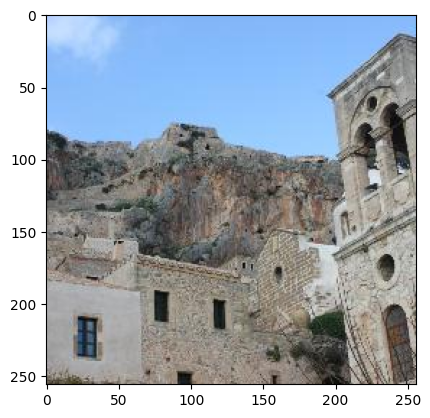

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train/bedroom_0038905.png')
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(256, 256, 3)

### DDPM

In [7]:
%cd "/content/gdrive/MyDrive/assign2/improved-diffusion"
!pip install -e .
!pip install mpi4py

/content/gdrive/MyDrive/assign2/improved-diffusion
Obtaining file:///content/gdrive/MyDrive/assign2/improved-diffusion
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
  Running setup.py develop for improved-diffusion
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.5-cp310-cp310-linux_x86_64.whl size=2746505 sha256=1109a2210b5caee537caf128024a1d5915c059c8b168687339ba3cad88111da6
  Stored in directory: /root/.cache/pip/wheels/18/2b/7f/c852523089e9182b45fca50ff56f49a51eeb6284fd25a66713
Successfully built mpi4py


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_allocated()

0

In [ ]:
%cd "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model"


/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model


In [23]:
#settings
# n=8000
MODEL_FLAGS="--image_size 64 --num_channels 64 --num_res_blocks 3"
DIFFUSION_FLAGS="--diffusion_steps 2500 --noise_schedule cosine"
TRAIN_FLAGS="--lr 1e-4 --batch_size 64 --save_interval 100"

# MODEL_FLAGS="--image_size 64 --num_channels 128 --num_res_blocks 3"
# DIFFUSION_FLAGS="--diffusion_steps 4000 --noise_schedule linear"
# TRAIN_FLAGS="--lr 1e-4 --batch_size 128"

In [25]:
# train the model 64_new
# MODEL_FLAGS="--image_size 64 --num_channels 64 --num_res_blocks 3"
# DIFFUSION_FLAGS="--diffusion_steps 2500 --noise_schedule cosine"
# TRAIN_FLAGS="--lr 1e-4 --batch_size 16 --save_interval 100"
!python "/content/gdrive/MyDrive/assign2/improved-diffusion/scripts/image_train.py" --data_dir "/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train/" $MODEL_FLAGS $DIFFUSION_FLAGS $TRAIN_FLAGS

流式输出内容被截断，只能显示最后 5000 行内容。
| mse_q0    | 0.16     |
| mse_q1    | 0.0419   |
| mse_q2    | 0.0171   |
| mse_q3    | 0.00491  |
| samples   | 2.77e+05 |
| step      | 4.32e+03 |
------------------------
------------------------
| grad_norm | 0.0981   |
| loss      | 0.0576   |
| loss_q0   | 0.17     |
| loss_q1   | 0.0427   |
| loss_q2   | 0.0178   |
| loss_q3   | 0.00512  |
| mse       | 0.0576   |
| mse_q0    | 0.17     |
| mse_q1    | 0.0427   |
| mse_q2    | 0.0178   |
| mse_q3    | 0.00512  |
| samples   | 2.77e+05 |
| step      | 4.33e+03 |
------------------------
------------------------
| grad_norm | 0.091    |
| loss      | 0.0558   |
| loss_q0   | 0.163    |
| loss_q1   | 0.0433   |
| loss_q2   | 0.0184   |
| loss_q3   | 0.00459  |
| mse       | 0.0558   |
| mse_q0    | 0.163    |
| mse_q1    | 0.0433   |
| mse_q2    | 0.0184   |
| mse_q3    | 0.00459  |
| samples   | 2.78e+05 |
| step      | 4.34e+03 |
------------------------
------------------------
| grad_norm | 0.0868   

In [26]:
!cp -av "/tmp/openai-2024-04-05-06-35-58-622137/" "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model64_2"


'/tmp/openai-2024-04-05-06-35-58-622137/' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model64_2/openai-2024-04-05-06-35-58-622137'
'/tmp/openai-2024-04-05-06-35-58-622137/model006600.pt' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model64_2/openai-2024-04-05-06-35-58-622137/model006600.pt'
'/tmp/openai-2024-04-05-06-35-58-622137/ema_0.9999_006600.pt' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model64_2/openai-2024-04-05-06-35-58-622137/ema_0.9999_006600.pt'
'/tmp/openai-2024-04-05-06-35-58-622137/log.txt' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model64_2/openai-2024-04-05-06-35-58-622137/log.txt'
'/tmp/openai-2024-04-05-06-35-58-622137/progress.csv' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model64_2/openai-2024-04-05-06-35-58-622137/progress.csv'
'/tmp/openai-2024-04-05-06-35-58-622137/model000000.pt' -> '/content/gdrive/MyDrive/a

In [14]:
# sampling
!python "/content/gdrive/MyDrive/assign2/improved-diffusion/scripts/image_sample.py" --model_path "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model64_2/openai-2024-04-05-05-38-56-624482/model001300.pt" $MODEL_FLAGS $DIFFUSION_FLAGS

Logging to /tmp/openai-2024-04-05-05-50-47-703636
creating model and diffusion...
sampling...
created 16 samples
created 32 samples
created 48 samples
created 64 samples
saving to /tmp/openai-2024-04-05-05-50-47-703636/samples_64x64x64x3.npz
sampling complete


In [37]:
!cp -av "/tmp/openai-2024-04-05-05-50-47-703636" "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64_2"


'/tmp/openai-2024-04-05-05-50-47-703636/log.txt' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64_2/openai-2024-04-05-05-50-47-703636/log.txt'
'/tmp/openai-2024-04-05-05-50-47-703636/progress.csv' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64_2/openai-2024-04-05-05-50-47-703636/progress.csv'
'/tmp/openai-2024-04-05-05-50-47-703636/samples_64x64x64x3.npz' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64_2/openai-2024-04-05-05-50-47-703636/samples_64x64x64x3.npz'


In [38]:
import numpy as np

sample_churchs = np.load('/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64_2/openai-2024-04-05-05-50-47-703636/samples_64x64x64x3.npz')
sample_churchs.files

['arr_0']

In [39]:
churchs = sample_churchs['arr_0']
data = churchs

In [19]:
!pwd

/content/gdrive/MyDrive/assign2/improved-diffusion


/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64_2


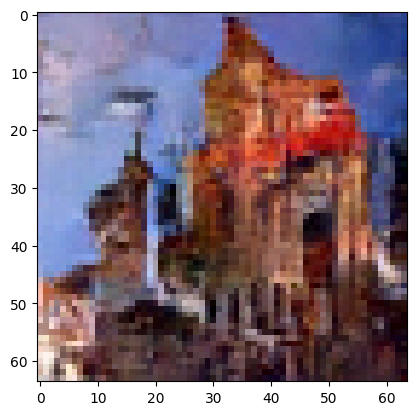

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%cd "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64_2"
# plt.imshow(data[0])
for i in np.arange(data.shape[0]):
  plt.imshow(data[i])
  plt.savefig("church"+str(i)+".png")

test 2

In [ ]:
# train the model 64_1
# MODEL_FLAGS="--image_size 64 --num_channels 32 --num_res_blocks 3"
# DIFFUSION_FLAGS="--diffusion_steps 1000 --noise_schedule cosine"
# TRAIN_FLAGS="--lr 1e-4 --batch_size 32 --save_interval 100"
!python "/content/gdrive/MyDrive/assign2/improved-diffusion/scripts/image_train.py" --data_dir "/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train/" $MODEL_FLAGS $DIFFUSION_FLAGS $TRAIN_FLAGS

Logging to /tmp/openai-2024-04-04-13-33-03-856501
creating model and diffusion...
creating data loader...
training...
------------------------
| grad_norm | 1.79     |
| loss      | 1        |
| loss_q0   | 1        |
| loss_q1   | 1        |
| loss_q2   | 1        |
| loss_q3   | 0.999    |
| mse       | 1        |
| mse_q0    | 1        |
| mse_q1    | 1        |
| mse_q2    | 1        |
| mse_q3    | 0.999    |
| samples   | 32       |
| step      | 0        |
------------------------
saving model 0...
saving model 0.9999...
------------------------
| grad_norm | 1.68     |
| loss      | 0.977    |
| loss_q0   | 0.982    |
| loss_q1   | 0.973    |
| loss_q2   | 0.975    |
| loss_q3   | 0.975    |
| mse       | 0.977    |
| mse_q0    | 0.982    |
| mse_q1    | 0.973    |
| mse_q2    | 0.975    |
| mse_q3    | 0.975    |
| samples   | 352      |
| step      | 10       |
------------------------
------------------------
| grad_norm | 1.7      |
| loss      | 0.929    |
| loss_q0   | 0.

In [ ]:
!cp -av "/tmp/openai-2024-04-04-13-33-03-856501" "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model128"


'/tmp/openai-2024-04-04-13-33-03-856501' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model128/openai-2024-04-04-13-33-03-856501'
'/tmp/openai-2024-04-04-13-33-03-856501/log.txt' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model128/openai-2024-04-04-13-33-03-856501/log.txt'
'/tmp/openai-2024-04-04-13-33-03-856501/progress.csv' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model128/openai-2024-04-04-13-33-03-856501/progress.csv'
'/tmp/openai-2024-04-04-13-33-03-856501/model000000.pt' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model128/openai-2024-04-04-13-33-03-856501/model000000.pt'
'/tmp/openai-2024-04-04-13-33-03-856501/ema_0.9999_000000.pt' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model128/openai-2024-04-04-13-33-03-856501/ema_0.9999_000000.pt'
'/tmp/openai-2024-04-04-13-33-03-856501/opt000000.pt' -> '/content/gdrive/MyDrive/assign2/i

In [ ]:
# sampling
!python "/content/gdrive/MyDrive/assign2/improved-diffusion/scripts/image_sample.py" --model_path "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/model128/openai-2024-04-04-13-33-03-856501/model000700.pt" $MODEL_FLAGS $DIFFUSION_FLAGS

Logging to /tmp/openai-2024-04-04-13-50-24-511729
creating model and diffusion...
sampling...
created 16 samples
created 32 samples
created 48 samples
created 64 samples
saving to /tmp/openai-2024-04-04-13-50-24-511729/samples_64x256x256x3.npz
sampling complete


In [ ]:
!cp -av "/tmp/openai-2024-04-04-13-50-24-511729" "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling128"


'/tmp/openai-2024-04-04-13-50-24-511729/log.txt' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling128/openai-2024-04-04-13-50-24-511729/log.txt'
'/tmp/openai-2024-04-04-13-50-24-511729/progress.csv' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling128/openai-2024-04-04-13-50-24-511729/progress.csv'
'/tmp/openai-2024-04-04-13-50-24-511729/samples_64x256x256x3.npz' -> '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling128/openai-2024-04-04-13-50-24-511729/samples_64x256x256x3.npz'


In [ ]:
import numpy as np

%cd '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling128/openai-2024-04-04-13-50-24-511729/'
# !pwd
sample_churchs = np.load('samples_64x256x256x3.npz')

/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling128/openai-2024-04-04-13-50-24-511729


In [ ]:
sample_churchs.files

['arr_0']

In [ ]:
churchs = sample_churchs['arr_0']
# churchs

In [ ]:
data = churchs
type(data)

numpy.ndarray

In [ ]:
churchs[0].shape

(256, 256, 3)

In [ ]:
# import numpy as np

# %cd '/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64'
# # !pwd
# sample_churchs = np.load('samples_100x64x64x3.npz')
# churchs = sample_churchs['arr_0']
# data = churchs


/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64


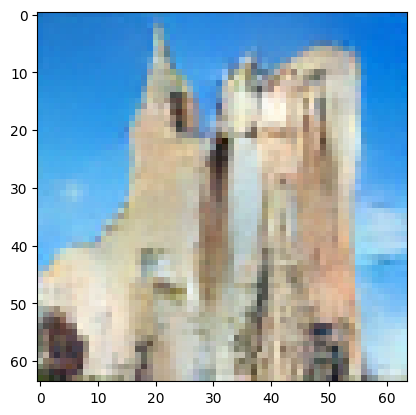

In [ ]:
# import numpy as np
# from PIL import Image

data = churchs

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# # 使用PIL库和numpy是只是为了快速得到一个可以用于保存为图片的数组，即从现有的图片直接转换成数组
# im = Image.open("/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train/bedroom_0038905.png")  # 打开图片
# im_array = np.array(im)  # 将图片转化为numpy数组

for i in np.arange(data.shape[0]):
  plt.imshow(data[i])
  plt.savefig("church"+str(i)+".png")


### Style GAN

In [ ]:
%cd "/content/gdrive/MyDrive/assign2/GAN_DDPM"

!pip install stylegan2_pytorch

In [ ]:
!pwd

/content/gdrive/MyDrive/assign2/GAN_DDPM


In [3]:
!stylegan2_pytorch --data "/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train"

continuing from previous epoch - 4
loading from version 1.8.9
default</content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train>:   3% 4050/150000 [04:02<196:48:15,  4.85s/it]G: 1.18 | D: 1.04 | GP: 0.03
default</content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train>:   3% 4100/150000 [04:40<113:45:38,  2.81s/it]G: 2.37 | D: 0.90 | GP: 0.17
default</content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train>:   3% 4150/150000 [05:19<86:12:47,  2.13s/it]G: 2.68 | D: 1.17 | GP: 1.56
default</content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train>:   3% 4200/150000 [05:57<72:19:03,  1.79s/it]G: 1.72 | D: 1.31 | GP: 0.11
default</content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train>:   3% 4250/150000 [06:35<64:06:00,  1.58s/it]G: 0.83 | D: 1.13 | GP: 0.35
default</content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train>:   3% 4300/150000 [07:13<58:31:53,  1.45s/it]G: 2.02 | D: 1.04 | GP: 0.12


In [29]:
# !pwd
%cd "/content/gdrive/MyDrive/assign2/lsun/"

/content/gdrive/MyDrive/assign2/lsun


In [30]:
!unzip "/content/gdrive/MyDrive/assign2/lsun/church_outdoor_val_lmdb.zip"

Archive:  /content/gdrive/MyDrive/assign2/lsun/church_outdoor_val_lmdb.zip
   creating: church_outdoor_val_lmdb/
  inflating: church_outdoor_val_lmdb/lock.mdb  
  inflating: church_outdoor_val_lmdb/data.mdb  


.mdp to images

In [31]:
# !pip install lmdb
# %cd "/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets"
!python "/content/gdrive/MyDrive/assign2/GAN_DDPM/datasets/lsun_church.py" "/content/gdrive/MyDrive/assign2/lsun/church_outdoor_val_lmdb" lsun_evl_church_output_dir

Image to .npz

Create a benchmark

In [32]:
from PIL import Image
import os
import numpy as np

path_to_files = "/content/gdrive/MyDrive/assign2/lsun/lsun_evl_church_output_dir/"
array_of_images = []

for _, file in enumerate(os.listdir(path_to_files)):
    if "direction.png" in file: # to check if file has a certain name
        single_im = Image.open(file)
        single_array = np.array(single_im)
        array_of_images.append(single_array)
np.savez("all_images.npz",array_of_images) # save all in one file

In [34]:
path_to_files = "/content/gdrive/MyDrive/assign2/improved-diffusion/datasets/church_train/"
array_of_images = []

for _, file in enumerate(os.listdir(path_to_files)):
    if "direction.png" in file: # to check if file has a certain name
        single_im = Image.open(file)
        single_array = np.array(single_im)
        array_of_images.append(single_array)
np.savez("church.npz",array_of_images) # save all in one file


In [ ]:
!python "/content/gdrive/MyDrive/assign2/GAN_DDPM/evaluations/evaluator.py" "/content/gdrive/MyDrive/assign2/lsun/church.npz" "/content/gdrive/MyDrive/assign2/improved-diffusion/improved_diffusion/sampling64/samples_100x64x64x3.npz"


In [ ]:
# !pip install blobfile
# !pip install mpi4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.5-cp310-cp310-linux_x86_64.whl size=2746500 sha256=38ba16fe6683551d42c603157c7d84385590d02afedc95e691263632bc4b0aa3
  Stored in directory: /root/.cache/pip/wheels/18/2b/7f/c852523089e9182b45fca50ff56f49a51eeb6284fd25a66713
Successfully built mpi4py


In [ ]:
# %cd "/content/gdrive/MyDrive/assign2/models"
# MODEL_FLAGS="--attention_resolutions 32,16,8 --class_cond False --diffusion_steps 1000 --dropout 0.1 --image_size 256 --learn_sigma True --noise_schedule linear --num_channels 256 --num_head_channels 64 --num_res_blocks 2 --resblock_updown True --use_fp16 True --use_scale_shift_norm True"
# !python "/content/gdrive/MyDrive/assign2/GAN_DDPM/image_sample.py" $MODEL_FLAGS --model_path  "/content/gdrive/MyDrive/assign2/GAN_DDPM/model/lsun_bedroom.pt" $SAMPLE_FLAGS

In [ ]:
# MODEL_FLAGS="--attention_resolutions 32,16,8 --class_cond False --diffusion_steps 1000 --dropout 0.1 --image_size 256 --learn_sigma True --noise_schedule linear --num_channels 256 --num_head_channels 64 --num_res_blocks 2 --resblock_updown True --use_fp16 True --use_scale_shift_norm True"
# !python "/content/gdrive/MyDrive/assign2/GAN_DDPM/image_sample.py" $MODEL_FLAGS --model_path  "/content/gdrive/MyDrive/assign2/GAN_DDPM/model/" $SAMPLE_FLAGS

In [ ]:
# style GAN
!wget https://openaipublic.blob.core.windows.net/diffusion/jul-2021/ref_batches/lsun/bedroom/stylegan_lsun_bedroom.npz

--2024-03-31 13:37:23--  https://openaipublic.blob.core.windows.net/diffusion/jul-2021/ref_batches/lsun/bedroom/stylegan_lsun_bedroom.npz
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.209.18.33
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.209.18.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9830400360 (9.2G) [application/octet-stream]
Saving to: ‘stylegan_lsun_bedroom.npz’

stylegan_lsun_bedro 100%[===================>]   9.16G  36.4MB/s    in 4m 51s  

2024-03-31 13:42:14 (32.3 MB/s) - ‘stylegan_lsun_bedroom.npz’ saved [9830400360/9830400360]



In [ ]:
# DDPM
!wget https://openaipublic.blob.core.windows.net/diffusion/jul-2021/ref_batches/lsun/bedroom/ddpm_lsun_bedroom.npz

--2024-03-31 13:29:42--  https://openaipublic.blob.core.windows.net/diffusion/jul-2021/ref_batches/lsun/bedroom/ddpm_lsun_bedroom.npz
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.209.18.33
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.209.18.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9830400360 (9.2G) [application/octet-stream]
Saving to: ‘ddpm_lsun_bedroom.npz’

ddpm_lsun_bedroom.n 100%[===================>]   9.16G  35.1MB/s    in 4m 54s  

2024-03-31 13:34:37 (31.9 MB/s) - ‘ddpm_lsun_bedroom.npz’ saved [9830400360/9830400360]



In [ ]:
# lsun bedroom benchmark
!wget https://openaipublic.blob.core.windows.net/diffusion/jul-2021/ref_batches/lsun/bedroom/VIRTUAL_lsun_bedroom256.npz

--2024-03-31 13:29:10--  https://openaipublic.blob.core.windows.net/diffusion/jul-2021/ref_batches/lsun/bedroom/VIRTUAL_lsun_bedroom256.npz
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.209.18.33
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.209.18.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1054074338 (1005M) [application/octet-stream]
Saving to: ‘VIRTUAL_lsun_bedroom256.npz’

VIRTUAL_lsun_bedroo 100%[===================>]   1005M  34.1MB/s    in 32s     

2024-03-31 13:29:42 (31.4 MB/s) - ‘VIRTUAL_lsun_bedroom256.npz’ saved [1054074338/1054074338]



In [ ]:
# !pip install scipy
# !pip install requests
# !pip install tqdm
# !pip install tensorflow
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
%cd "/content/gdrive/MyDrive/assign2/GAN_DDPM/evaluations"
# Style GAN
!python evaluator.py VIRTUAL_lsun_bedroom256.npz stylegan_lsun_bedroom.npz

/content/gdrive/MyDrive/assign2/GAN_DDPM/evaluations
2024-03-31 13:42:15.432672: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-31 13:42:15.485639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 13:42:15.485684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 13:42:15.487455: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 13:42:1

In [ ]:
%cd "/content/gdrive/MyDrive/assign2/GAN_DDPM/evaluations"
!python evaluator.py VIRTUAL_lsun_bedroom256.npz ddpm_lsun_bedroom.npz

/content/gdrive/MyDrive/assign2/GAN_DDPM/evaluations
2024-03-31 13:35:15.357512: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-31 13:35:15.410530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 13:35:15.410574: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 13:35:15.412403: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 13:35:1